## House Price Prediction using Linear Regression

* Data Collection
* Data Preprocessing
* Feature Engineering
* Model Selection
* Model Training
* Model Prediction
* Model Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Model Coefficients:
Slope (Coefficient): 2.968467510701019
Intercept: 1.2221510774472288

Evaluation Metrics:
Mean Squared Error (MSE): 0.9924386487246482
R-squared (R^2): 0.7469629925504755


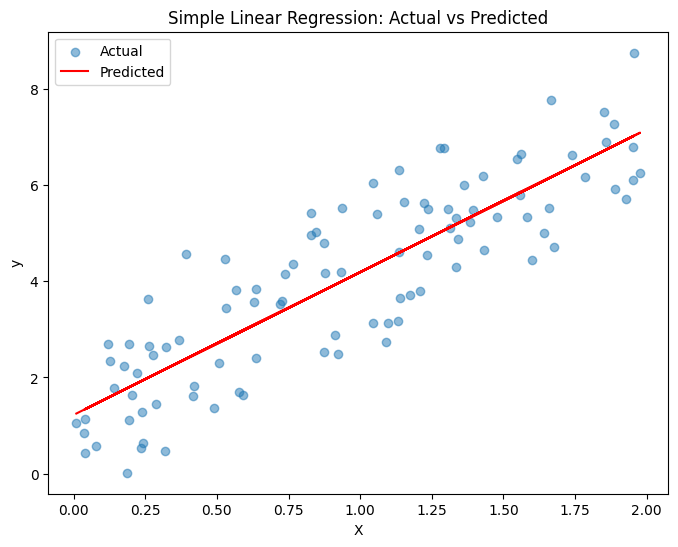

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Generate 100 random numbers between 0 and 2
y = 3 * X + 1 + np.random.randn(100, 1)  # Create y values with noise

# Create a LinearRegression model
model = LinearRegression()

# Fit the model using the entire dataset
model.fit(X, y)

# Make predictions on the same dataset used for training
y_pred = model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print model coefficients
print("Model Coefficients:")
print("Slope (Coefficient):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

# Visualize the fitted line on the original data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


https://medium.com/@kaushiksimran827/house-price-prediction-a-simple-guide-with-scikit-learn-and-linear-regression-f91a27b9d650

In [2]:
url='https://raw.githubusercontent.com/ShilpaSayuraML/DS-ML-Workshop/main/Intro/USA_Housing.csv'

In [4]:
USAhousing = pd.read_csv(url)
USAhousing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Feature Engineering

In [8]:
df = USAhousing.drop('Address', axis=1)


<Axes: >

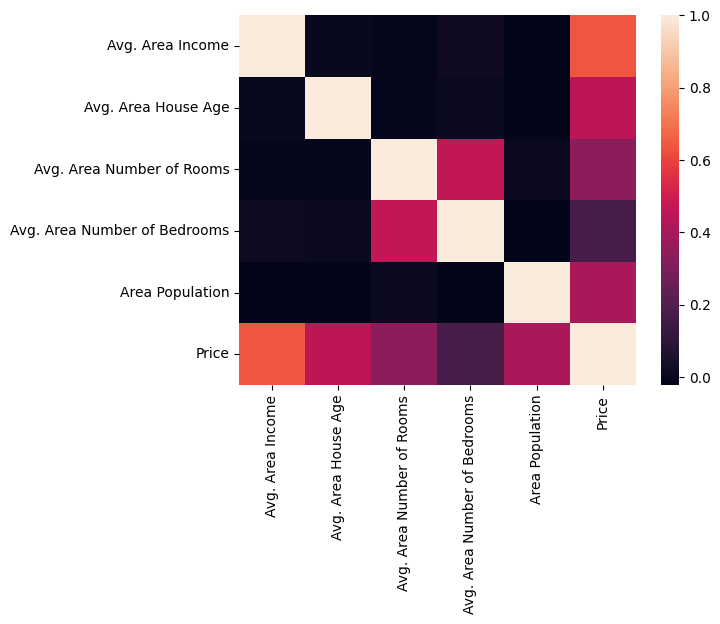

In [9]:
sns.heatmap(df.corr())

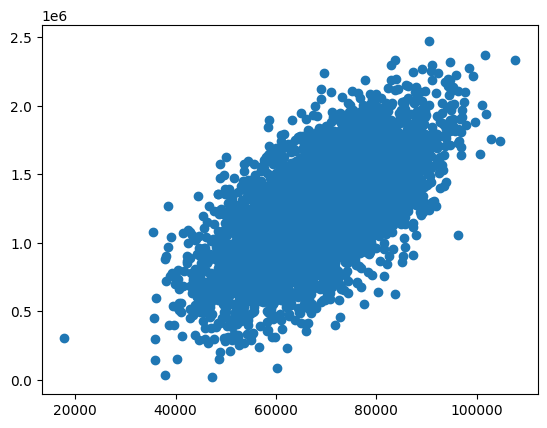

In [13]:
plt.scatter(df['Avg. Area Income'],df['Price'])

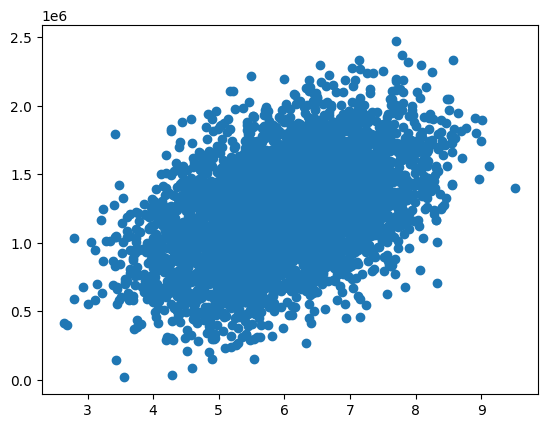

In [14]:
plt.scatter(df['Avg. Area House Age'],df['Price'])

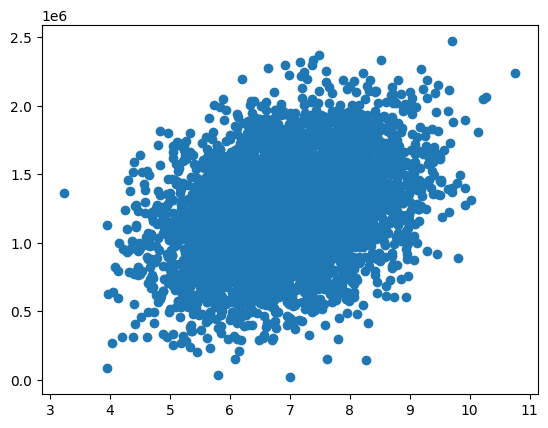

In [15]:
plt.scatter(df['Avg. Area Number of Rooms'],df['Price'])

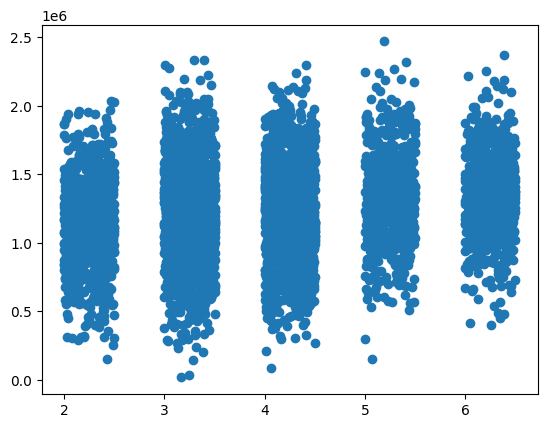

In [16]:
plt.scatter(df['Avg. Area Number of Bedrooms'],df['Price'])

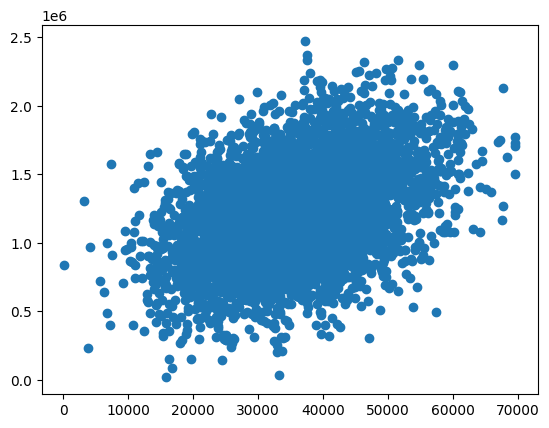

In [17]:
plt.scatter(df['Area Population'],df['Price'])

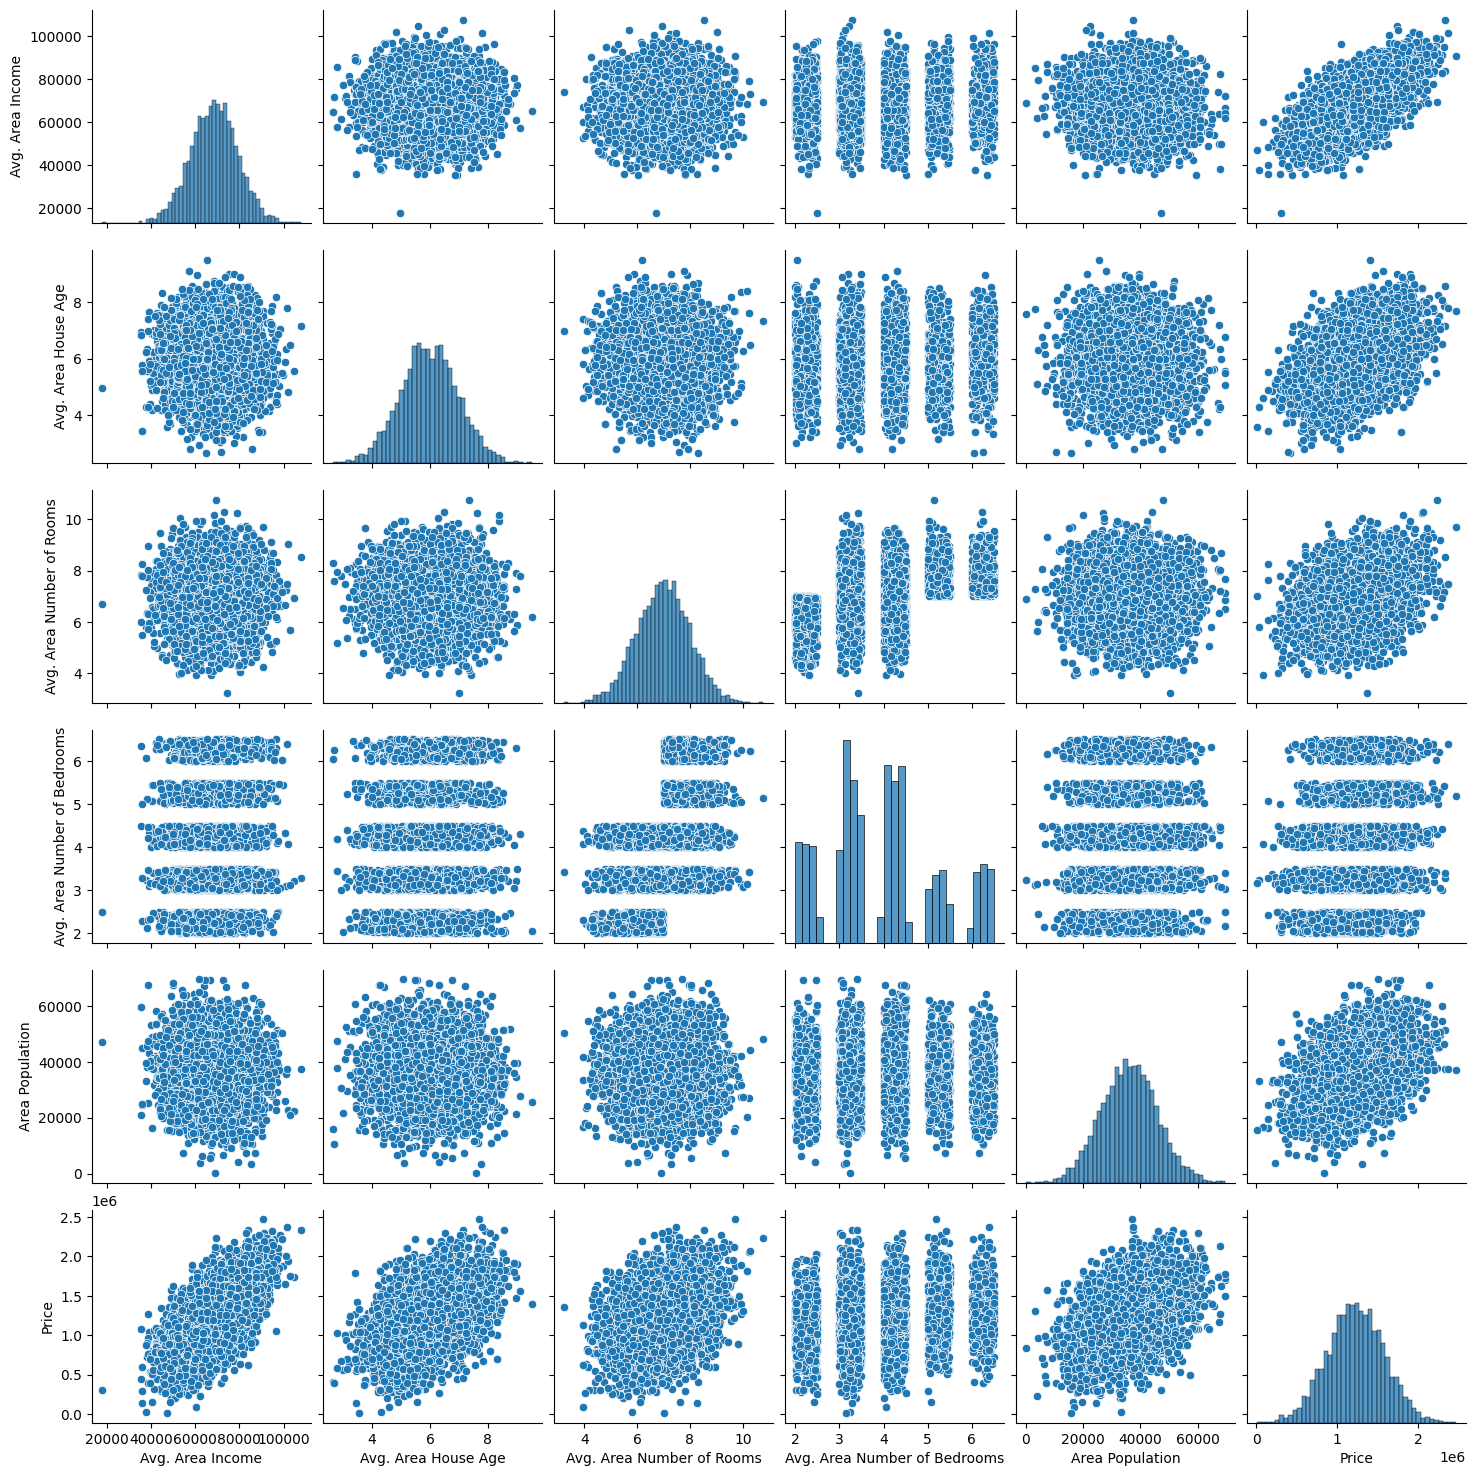

In [18]:
sns.pairplot(df)

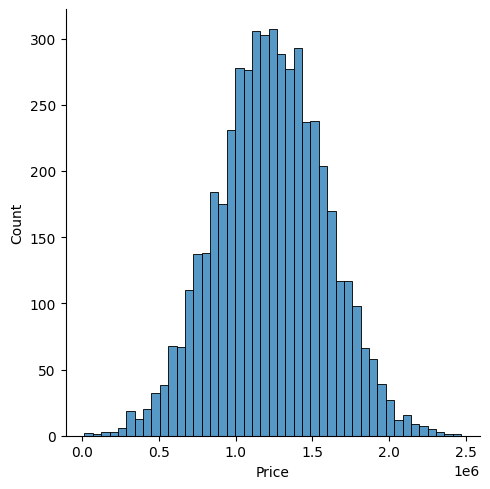

In [20]:
sns.displot(df['Price'])

## Simple Linear regression



In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming X and y are defined as:
X = df['Avg. Area Number of Rooms'].values.reshape(-1, 1)
y = df['Price'].values

# Create a LinearRegression model
model = LinearRegression()

# Fit the model using X (feature) and y (target)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print("R-squared (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Print the coefficients
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)


R-squared (R^2): 0.11267062525400562
Mean Absolute Error (MAE): 265967.50904136384
Mean Squared Error (MSE): 110620797455.17807
Root Mean Squared Error (RMSE): 332597.0496790043
Coefficient (slope): 117841.63757442181
Intercept: 408619.8194021649


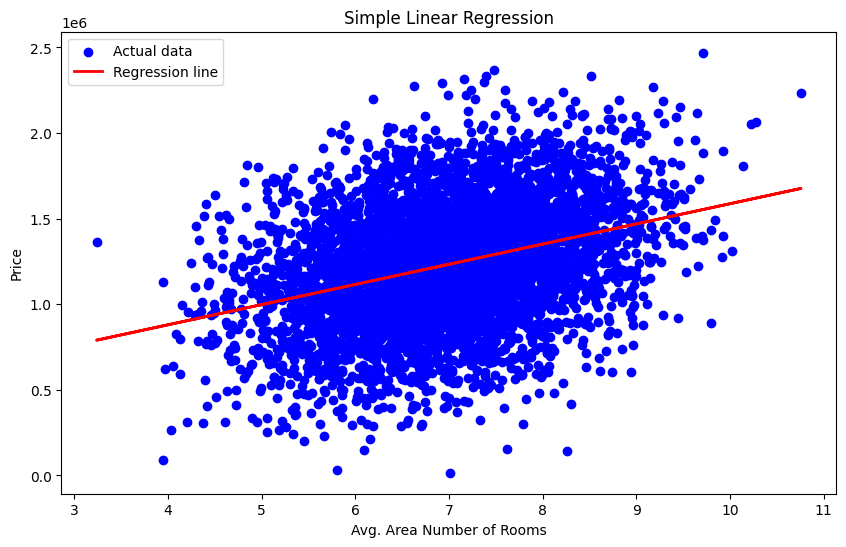

In [22]:
# Plotting the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')  # Scatter plot of the actual data
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')  # Plotting the regression line

# Adding labels and title
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()

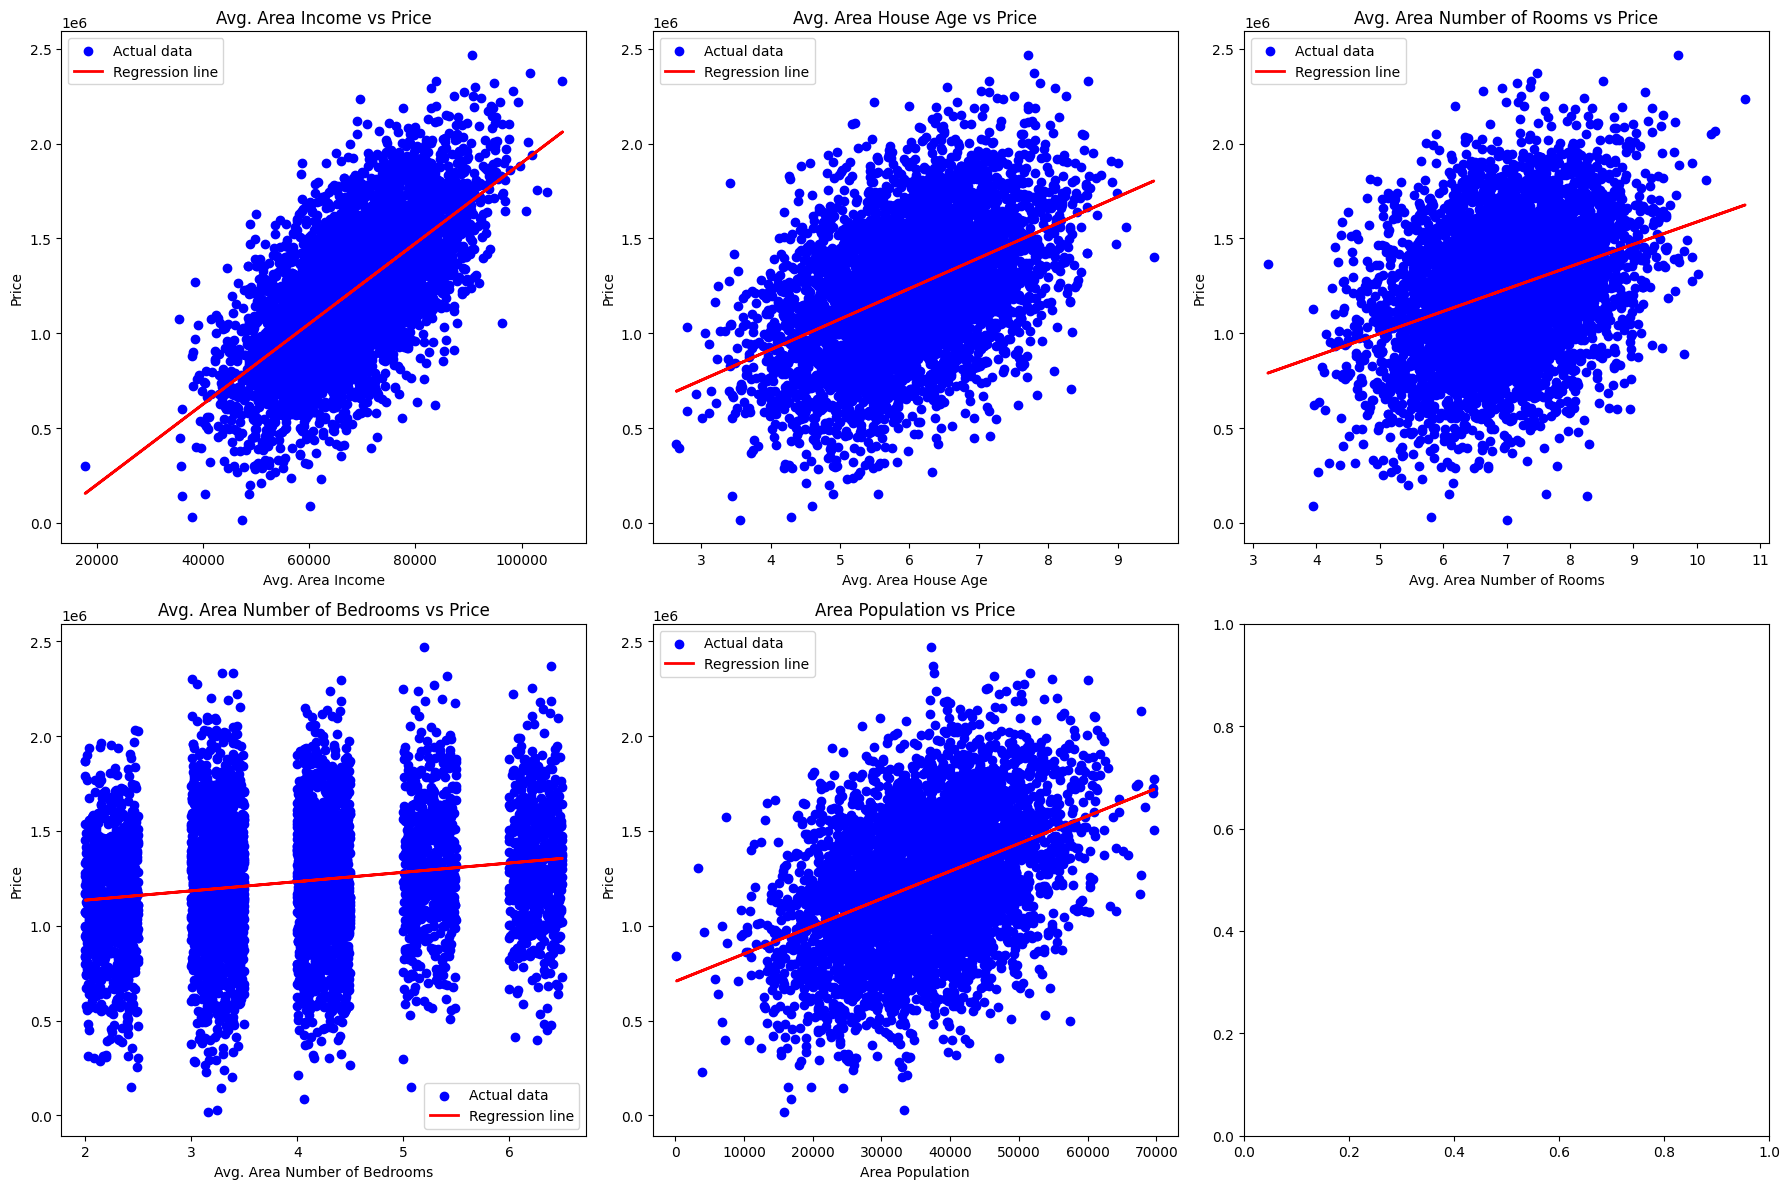

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the features and target variable
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms', 'Area Population']
target = 'Price'

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Reshape the axes array for easier indexing
axes = axes.ravel()

# Loop through each feature and perform linear regression
for i, feature in enumerate(features):
    # Extract the feature (X) and target (y)
    X = df[feature].values.reshape(-1, 1)
    y = df[target].values

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model using X (feature) and y (target)
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Plot the data points and the regression line on the corresponding subplot
    ax = axes[i]
    ax.scatter(X, y, color='blue', label='Actual data')  # Scatter plot of the actual data
    ax.plot(X, y_pred, color='red', linewidth=2, label='Regression line')  # Plotting the regression line

    # Add labels and title to each subplot
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    ax.set_title(f'{feature} vs {target}')
    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


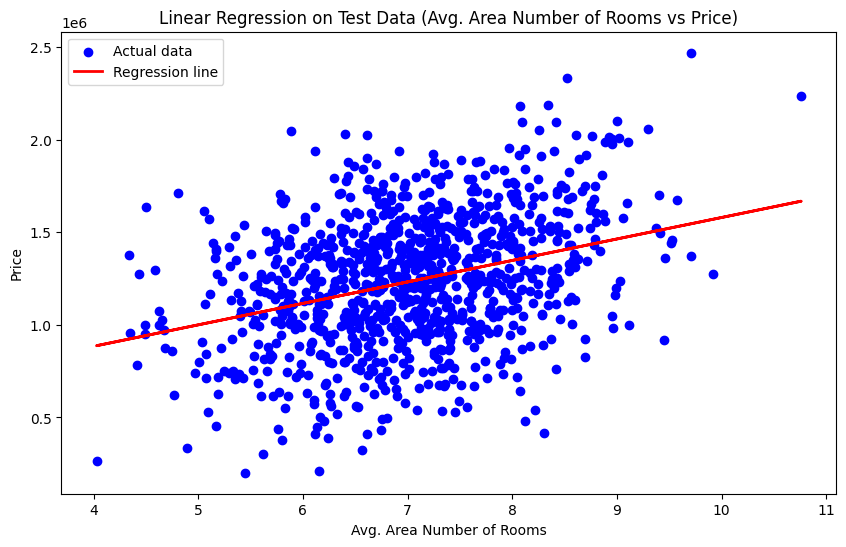

Evaluation Metrics on Test Set:
R-squared (R^2): 0.1248933662693521
Mean Absolute Error (MAE): 263848.3886469575
Mean Squared Error (MSE): 107666516394.19522
Root Mean Squared Error (RMSE): 328125.76307598164

Model Coefficients:
Coefficient (slope): 115883.23840944548
Intercept: 420698.6070043823


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are defined as:
X = df['Avg. Area Number of Rooms'].values.reshape(-1, 1)
y = df['Price'].values

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model using training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics on the test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Plot the actual test data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')  # Scatter plot of the actual test data
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')  # Plotting the regression line

# Add labels and title to the plot
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Price')
plt.title('Linear Regression on Test Data (Avg. Area Number of Rooms vs Price)')
plt.legend()

# Display the plot
plt.show()

# Print evaluation metrics
print("Evaluation Metrics on Test Set:")
print("R-squared (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Print the coefficients of the model
print("\nModel Coefficients:")
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)


# ## multiple linear regression (MLR)

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame containing the data
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model using training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Evaluation Metrics on Test Set:")
print("R-squared (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Print the coefficients of the model
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model.intercept_)


Evaluation Metrics on Test Set:
R-squared (R^2): 0.9179971706834289
Mean Absolute Error (MAE): 80879.0972348982
Mean Squared Error (MSE): 10089009300.894518
Root Mean Squared Error (RMSE): 100444.06055558745

Model Coefficients:
Avg. Area Income: 21.65220576362337
Avg. Area House Age: 164666.48072189192
Avg. Area Number of Rooms: 119624.01223205797
Avg. Area Number of Bedrooms: 2440.377611031628
Area Population: 15.270313429966336
Intercept: -2635072.900933358


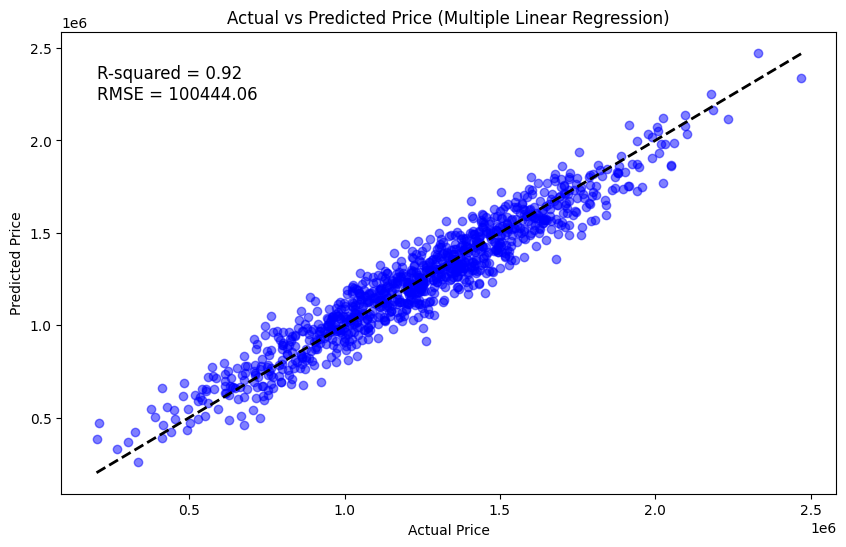

In [31]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Multiple Linear Regression)')
plt.text(y_test.min(), y_test.max()*0.9, f'R-squared = {r2:.2f}\nRMSE = {rmse:.2f}', fontsize=12)
plt.show()

Residuals represent the differences between the observed values (y_test, actual prices in this case) and the predicted values (y_pred) made by the model. A good model would have residuals that are randomly distributed around zero without any specific patterns, indicating that the model captures most of the variability in the data.

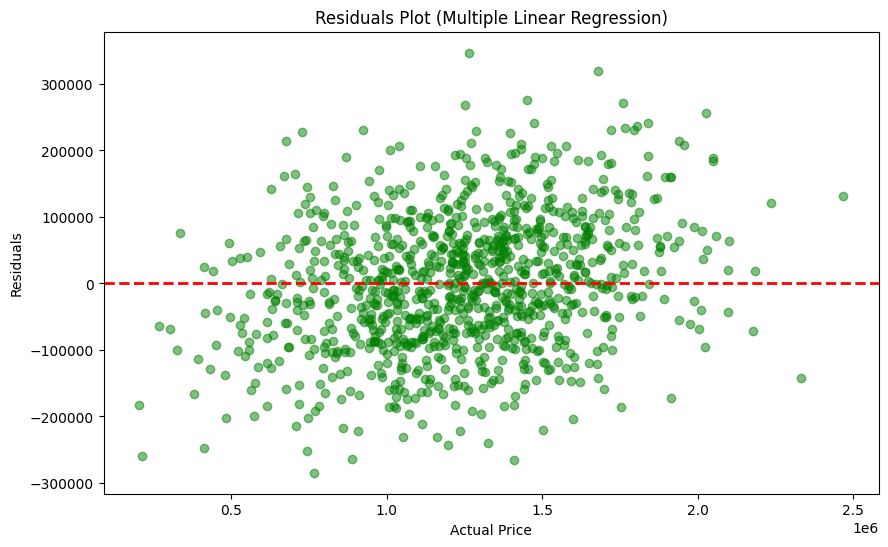

In [32]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)  # Horizontal line at y=0
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Multiple Linear Regression)')
plt.show()